# Estatística Probabilidade e Amostragem - Desafio Final
Ludmylla Martins Caetano -- Squad Rita Levi-Montalcini

Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).

Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

In [ ]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Base de dados
df = pd.read_csv("populacao_brasileira.csv")
df = df.rename(columns={'Unnamed: 0': 'ID', 'estado': 'Estado', 'idade': 'Idade', 'escolaridade': 'Escolaridade', 'nível de proficiência em inglês': 'Nível de proficiência em inglês', 'renda': 'Renda', 'sexo': 'Sexo'})
df.head()

,ID,Estado,Idade,Escolaridade,Nível de proficiência em inglês,Renda,Sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.describe()

,ID,Idade,Renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


##1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

A probabilidade complementar pode ser obtida através da expressão:
$$ P(A^{C})= 1 - P(A) $$
Onde:
- $P(A)$ a probabilidade do Evento em questão ocorrer;
- $P(A^{C})$ é a probabilidade complementar ao evento.

In [ ]:
#Probabilidade Complementar
avancado = pd.DataFrame((df['Nível de proficiência em inglês'] == 'Avançado')).sum().sum() #quantidade de pessoas fluentes em inglês
total = df['Nível de proficiência em inglês'].count() #quantidade de dados coletados
prob_avan = avancado/total #probabilidade de ser fluente em inglês
prob_complementar = (1 - prob_avan)*100 # probabilidade complementar em porcentagem

print(f"A probabilidade de falar inglês é de {prob_avan * 100 :.1f}%.")
print(f"Logo, a probabilidade complementar é de {prob_complementar :.1f}%.")

A probabilidade de falar inglês é de 34.4%.
Logo, a probabilidade complementar é de 65.6%.


##2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrando as pessoas dos estados do Pará e de Alagoas
df_pa_al = pd.concat([df[df['Estado'] == 'PA'], df[df['Estado']=='AL']])
df_pa_al

,ID,Estado,Idade,Escolaridade,Nível de proficiência em inglês,Renda,Sexo
17,17,PA,19,Médio,Básico,2588.12,M
32,32,PA,33,Superior,Intermediário,3018.42,F
74,74,PA,48,Fundamental,Intermediário,3279.97,M
116,116,PA,29,Fundamental,Intermediário,5573.36,F
150,150,PA,47,Pós-graduação,Básico,3710.96,M
...,...,...,...,...,...,...,...
968,968,AL,25,Médio,Avançado,3696.39,F
972,972,AL,22,Pós-graduação,Avançado,1858.31,M
976,976,AL,36,Médio,Avançado,2917.32,F
977,977,AL,37,Fundamental,Intermediário,2878.25,F


In [ ]:
# Verificando a quantidade de pessoas com a renda acima de 5000
maior = (df_pa_al['Renda'] > 5000).sum()
total = (df_pa_al['Renda']).count()

# Calculando a probabilidade
probabilidade = maior/total
print(f"A probabilidade da renda ser maior que R$5.000,00 é de {probabilidade * 100 :.2f}%.")

A probabilidade da renda ser maior que R$5.000,00 é de 5.06%.


##3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Filtrando as pessoas do estado do Amazonas
df_am = df[df['Estado'] == 'AM']
am_total = df_am['Estado'].count()
df_am_sup = pd.concat([df_am[df_am['Escolaridade'] == 'Superior'], df_am[df_am['Escolaridade'] == 'Pós-graduação']])
am_comp = df_am_sup['Estado'].count()

# Calculando a probabilidade
probabilidade_am_comp = am_comp/am_total
print(f"A probabilidade de uma pessoa ter ensino superior completo no Amazonas é de {probabilidade_am_comp * 100 :.2f}%.")

A probabilidade de uma pessoa ter ensino superior completo no Amazonas é de 55.26%.


In [ ]:
# Probabilidade da quinta pessoa ter superior completo
# Calculando a Probabilidade Complementar
probabilidade_am_comp_complementar = 1 - probabilidade_am_comp

# A probabilidade da quinta pessoa ter superior completo
# é igual a probabilidade complementar multiplicada por ela mesma 4 vezes e depois multiplicada pela probabilidade efetiva
probabilidade_am_comp_quinta = probabilidade_am_comp*(probabilidade_am_comp_complementar**4)

print(f"A probabilidade da quinta pessoa ter ensino superior completo é de {probabilidade_am_comp_quinta * 100 :.2f}%.")

A probabilidade da quinta pessoa ter ensino superior completo é de 2.21%.


##4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

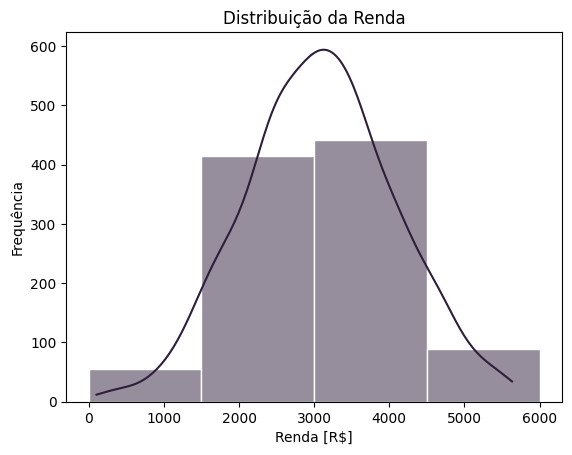

A renda está em sua maioria na faixa 3: [3000 - 4500]


In [ ]:
# Gráfico da distribuição da renda

sns.set_palette("mako")
sns.histplot(df['Renda'], bins=[0, 1500, 3000, 4500, 6000], kde=True, edgecolor='white')
plt.title('Distribuição da Renda')
plt.xlabel('Renda [R$]')
plt.ylabel('Frequência')
plt.show()

# Renda média
print(f'A renda está em sua maioria na faixa 3: [3000 - 4500]')

In [ ]:
# Quantidade de pessoas em cada faixa
faixa_1 = (df['Renda'] < 1500).sum()
faixa_2 = (df['Renda'] < 3000).sum() - (df['Renda'] < 1500).sum()
faixa_3 = (df['Renda'] < 4500).sum() - (df['Renda'] < 3000).sum()
faixa_4 = (df['Renda'] < 5000).sum() - (df['Renda'] < 4500).sum()
print(f'Quantidade de pessoas em cada faixa: \nFaixa 1: {faixa_1}\nFaixa 2: {faixa_2}\nFaixa 3: {faixa_3}\nFaixa 4: {faixa_4}')

Quantidade de pessoas em cada faixa: 
Faixa 1: 55
Faixa 2: 414
Faixa 3: 442
Faixa 4: 57


Text(0, 0.5, 'Pessoas')

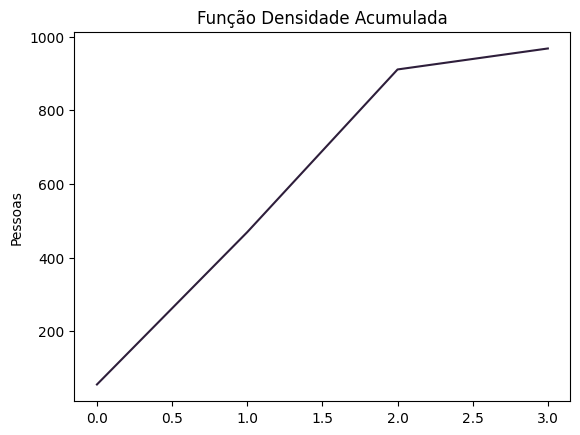

In [ ]:
faixa_1 = 55
faixa_2 = 414
faixa_3 = 442
faixa_4 = 57

faixa = [faixa_1, faixa_2, faixa_3, faixa_4]
func_faixa = np.cumsum(faixa)

sns.set_palette("mako")
a = sns.lineplot(func_faixa)
#a.set_xticklabels(['Faixa 1', 'Faixa 2', 'Faixa 3', 'Faixa 4'])
plt.title('Função Densidade Acumulada')
plt.ylabel('Pessoas')
#plt.xlabel('Faixa')

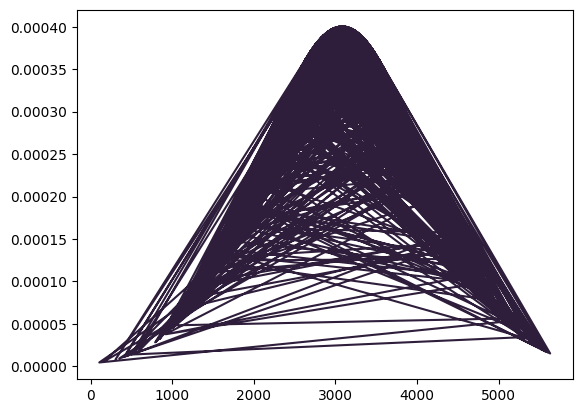

In [ ]:
# Função densidade de probabilidade
from scipy.stats import norm

media = df['Renda'].mean()
desvio = df['Renda'].std()
x = df['Renda']
plt.plot(x, norm.pdf(x, loc=media, scale=desvio))

plt.show()

##5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [ ]:
# Média e Variância
media = df['Renda'].mean()
variancia = df['Renda'].var()

print(f'Média: {media :.2f}\nVariância: {variancia :.2f}')

#plt.plot(norm.cdf(df['Renda'], loc=media, scale=variancia**2))

Média: 3082.54
Variância: 993156.23


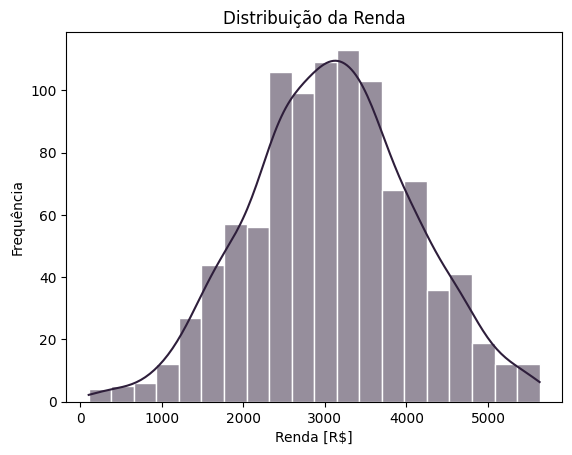

In [ ]:
# Gráfico da Distribuição
sns.set_palette("mako")
sns.histplot(df['Renda'], bins=20, kde=True, edgecolor='white')
plt.title('Distribuição da Renda')
plt.xlabel('Renda [R$]')
plt.ylabel('Frequência')
plt.show()

##6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
# Probabilidade de ter pós-graduação
com_pos = (df['Escolaridade'] == 'Pós-graduação').sum()
total = df['Escolaridade'].count()
probabilidade_com_pos = com_pos/total
print(f"A probabilidade de uma pessoa ter pós-graduação é de {probabilidade_com_pos * 100 :.2f}%.")

# Probabilidade na população brasileira
pop_total = 1000000
pop_buscada = 243000

from scipy.stats import binom
pessoas_com_pos = binom.pmf(pop_buscada, pop_total, probabilidade_com_pos)
print(f"A probabilidade de 243 mil pessoas terem pós-graduação é de {pessoas_com_pos * 100 :.6f}%.")

A probabilidade de uma pessoa ter pós-graduação é de 25.30%.
A probabilidade de 243 mil pessoas terem pós-graduação é de 0.000000%.


##7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
prob_fundamental = ((df['Escolaridade'] == 'Fundamental').sum())/total
prob_medio = ((df['Escolaridade'] == 'Médio').sum())/total
prob_superior = ((df['Escolaridade'] == 'Superior').sum())/total
prob_pos = ((df['Escolaridade'] == 'Pós-graduação').sum())/total
df['Escolaridade'].value_counts()

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: Escolaridade, dtype: int64

In [ ]:
densidade = [prob_fundamental, prob_medio, prob_superior, prob_pos]
func_densidade = np.cumsum(densidade)

Text(0.5, 0, 'Escolaridade')

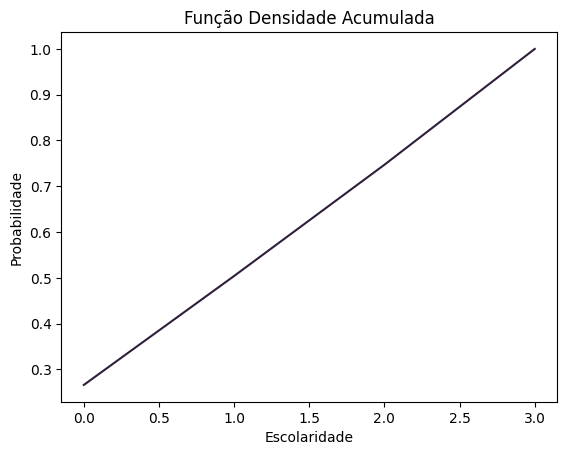

In [ ]:
sns.set_palette("mako")
b = sns.lineplot(func_densidade)
#b.set_xticklabels(['Fundamental', 'Médio', 'Ensino Superior', 'Pós-Graduação'])
plt.title('Função Densidade Acumulada')
plt.ylabel('Probabilidade')
plt.xlabel('Escolaridade')

In [ ]:
# Função densidade de probabilidade
from scipy.stats import norm

media = df['Renda'].mean()
x = df['Renda']
plt.plot(x, norm.pdf(x, loc=2, scale=0.5))
plt.show()

##8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

A margem de erro é dada por: $$z \times \frac{\sigma}{\sqrt{n}}$$
Onde:
* $z$: é o score z;
* $\sigma$: é o desvio padrão da população;
* $n$: é o tamanho da amostra.

A margem de erro também pode ser obtida pela diferença entre o limite superior e o limite inferior do intervalo de confiança:
$$Margem_{erro} = Limite_{superior} - Limite_{inferior}$$

In [ ]:
import scipy.stats as stats

ingles_intermediario = ((df['Nível de proficiência em inglês'] == 'Intermediário').sum())/total
total = df['ID'].count() # total de pessoas na amostra

intervalo_confianca = stats.norm.interval(0.95, loc=ingles_intermediario, scale=np.sqrt(ingles_intermediario * (1 - ingles_intermediario) / total))
print(f'O intervalo de confiança para 95% de confiança varia entre {intervalo_confianca[0] * 100 :.2f}% e  {intervalo_confianca[1] * 100 :.2f}%')
print(f'A margem de erro é de +/-{(intervalo_confianca[1]  - intervalo_confianca[0]) * 100 :.2f}%')

O intervalo de confiança para 95% de confiança varia entre 29.99% e  35.81%
A margem de erro é de +/-5.82%


Utilizando a expressão para a margem de erro:
$$z \times \sqrt {\frac{p\times(1-p)}{n}}$$

In [ ]:
p = 0.329
n = 1000
erro = 1.96 * np.sqrt((p*(1-p))/n)
print(f'A margem de erro é de +/-{erro * 100 :.2f}%')

A margem de erro é de +/-2.91%


##9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
renda_media = df['Renda'].mean()
renda_mil_maior = (df['Renda'] > renda_media + 1000).sum()
total = df['ID'].count() # total de pessoas na amostra
prob_mil_maior = renda_mil_maior/total

q_pessoas = 60
prob_sessenta_pessoas = binom.pmf(q_pessoas, total, prob_mil_maior)

print(f"A renda média é de {renda_media * 100 :.2f}%.\nA probabilidade da renda ser mil reais superior a média é de {prob_mil_maior * 100 :.2f}%.")
print(f"A probabilidade de encontrar 60 pessoas com a renda mil reais superior à média é de {prob_sessenta_pessoas * 100}%.")

A renda média é de 308253.72%.
A probabilidade da renda ser mil reais superior a média é de 16.10%.
A probabilidade de encontrar 60 pessoas com a renda mil reais superior à média é de 1.0995205651637739e-20%.


##10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
# Separando as pessoas do Sudeste
df_sudeste = df[df['Estado'].isin(['SP', 'MG', 'RJ', 'ES'])]
df_sudeste

,ID,Estado,Idade,Escolaridade,Nível de proficiência em inglês,Renda,Sexo
12,12,SP,53,Médio,Intermediário,3086.59,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
22,22,SP,19,Médio,Básico,3289.77,F
39,39,SP,38,Pós-graduação,Avançado,3770.87,F
40,40,MG,26,Superior,Básico,1521.41,M
...,...,...,...,...,...,...,...
964,964,RJ,55,Médio,Básico,2181.80,F
969,969,ES,43,Pós-graduação,Básico,3955.31,M
979,979,MG,37,Médio,Intermediário,3630.81,M
985,985,ES,55,Fundamental,Intermediário,2040.56,M


In [ ]:
# Probabilidade
df_sudeste_homem = df_sudeste[(df_sudeste['Sexo']=='M') & (df_sudeste['Escolaridade']=='Fundamental') & (df_sudeste['Renda']>2000)]
total = df['ID'].count() # total de pessoas na amostra
probabilidade = (df_sudeste_homem['ID'].count())/total

print(f"A probabilidade de de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais é de {probabilidade * 100 :.2f}%.")

A probabilidade de de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais é de 1.90%.
